<a href="https://colab.research.google.com/github/SirojWongpitakroj/shark-attack-analysis/blob/main/Shark_Attacks_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialization

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [205]:
# Updated to read directly from the GitHub repository raw link
url = "https://raw.githubusercontent.com/SirojWongpitakroj/shark-attack-analysis/main/attacks.csv"
df = pd.read_csv(url, encoding='cp1252')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [206]:
df.shape

(25723, 24)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

#Data Cleaning

##Human Error Columns

In [208]:
display(df[df['Unnamed: 22'].notnull() | df['Unnamed: 23'].notnull()][['Unnamed: 22', 'Unnamed: 23']])

,Unnamed: 22,Unnamed: 23
1478,stopped here,NaN
4415,NaN,Teramo
5840,NaN,change filename


In [209]:
df.drop(columns=['Unnamed: 22', 'Unnamed: 23'], inplace=True)

df.shape

(25723, 22)

## Drop Unrelated Columns

In [210]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [211]:
columns_to_drop = ['pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order']
df.drop(columns=columns_to_drop, inplace=True)

display(df.head())

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper


##Unnescessay Rows

In [212]:
display(df.iloc[6300:6305])

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
df = df.iloc[:6302]

print(f"New shape: {df.shape}")
display(df.tail())

New shape: (6302, 16)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker


## Clean Features

### Age

In [214]:
unique_ages = df['Age'].unique()
print(f"Unique values in 'Age' ({len(unique_ages)} total):")
print(unique_ages)

Unique values in 'Age' (158 total):
['57' '11' '48' nan '18' '52' '15' '12' '32' '10' '21' '34' '30' '60' '33'
 '29' '54' '41' '37' '56' '19' '25' '69' '38' '55' '35' '46' '45' '14'
 '40s' '28' '20' '24' '26' '49' '22' '7' '31' '17' '40' '13' '42' '3' '8'
 '50' '16' '82' '73' '20s' '68' '51' '39' '58' 'Teen' '47' '61' '65' '36'
 '66' '43' '60s' '9' '72' '59' '6' '27' '64' '23' '71' '44' '62' '63' '70'
 '18 months' '53' '30s' '50s' 'teen' '77' '74' '28 & 26' '5' '86'
 '18 or 20' '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' '36 & 26' '8 or 10'
 '84' '\xa0 ' ' ' '30 or 36' '6½' '21 & ?' '75' '33 or 37' 'mid-30s'
 '23 & 20' ' 30' '7      &    31' ' 28' '20?' "60's" '32 & 30' '16 to 18'
 '87' '67' 'Elderly' 'mid-20s' 'Ca. 33' '74 ' '45 ' '21 or 26' '20 ' '>50'
 '18 to 22' 'adult' '9 & 12' '? & 19' '9 months' '25 to 35' '23 & 26' '1'
 '(adult)' '33 & 37' '25 or 28' '37, 67, 35, 27,  ? & 27' '21, 34,24 & 35'
 '30 & 32' '50 & 30' '17 & 35' 'X' '"middle-age"' '13 or 18' '34 & 19'
 '33 & 26' '2 to

There are some non-integers and need to be transformed into integers such that it can be plotted to be visualized

In [215]:
def clean_age_val(val):
    if pd.isnull(val):
        return np.nan

    val = str(val).lower().strip()

    # Handle 'teen' cases
    if 'teen' in val:
        return 15.0

    # Handle 'months' cases
    if 'month' in val:
        nums = re.findall(r'\d+', val)
        if nums:
            return float(nums[0]) / 12.0
        return np.nan

    # Handle 's' suffixes (decades like 20s, 60's)
    if re.search(r'\d+s', val) or re.search(r"\d+'s", val):
        nums = re.findall(r'\d+', val)
        if nums:
            return float(nums[0]) + 5.0

    # Handle complex strings (and, &, or, to, comma)
    if any(x in val for x in ['and', '&', 'or', 'to', ',']):
        nums = re.findall(r'\d+', val)
        if nums:
            return np.mean([float(n) for n in nums])

    # General extraction of the first numeric sequence
    try:
        nums = re.findall(r'\d+', val)
        if nums:
            return float(nums[0])
    except:
        pass

    return np.nan

df['Age'] = df['Age'].apply(clean_age_val)

In [216]:
unique_ages_clean = df['Age'].unique()
print(unique_ages_clean)

[57.         11.         48.                 nan 18.         52.
 15.         12.         32.         10.         21.         34.
 30.         60.         33.         29.         54.         41.
 37.         56.         19.         25.         69.         38.
 55.         35.         46.         45.         14.         28.
 20.         24.         26.         49.         22.          7.
 31.         17.         40.         13.         42.          3.
  8.         50.         16.         82.         73.         68.
 51.         39.         58.         47.         61.         65.
 36.         66.         43.          9.         72.         59.
  6.         27.         64.         23.         71.         44.
 62.         63.         70.          1.5        53.         77.
 74.          5.         86.         12.5        84.         75.
 21.5        87.         67.         23.5        10.5         0.75
 24.5         1.         26.5        38.6        28.5        15.5
 29.5         0.166666

In [217]:
null_age = df['Age'].isnull().sum()

print(f"Total rows in dataset: {len(df)}")
print(f"Null values in 'Age' column: {null_age}")

Total rows in dataset: 6302
Null values in 'Age' column: 2846


There are 45% of null values in comparison with integers. If we dropped those rows then we lose almost half of the context, therefore we should keep it as it is and filter out the null when we need to.

### Activity

In [218]:
# 1. Get non-null activity values
activities = df['Activity'].dropna().astype(str)

# 2. Tokenize words: lowercase and extract alphanumeric sequences
# Using re.findall(r'\w+', text) as requested
all_words = []
for activity in activities:
    words = re.findall(r'\w+', activity.lower())
    all_words.extend(words)

# 3. Calculate word frequencies
word_freq = Counter(all_words)

# Display the top 20 most common words to verify
print("Top 20 most common words in 'Activity':")
print(word_freq)

Top 20 most common words in 'Activity':
Counter({'swimming': 1117, 'surfing': 1104, 'fishing': 741, 'diving': 553, 'spearfishing': 431, 'the': 360, 'in': 246, 'a': 237, 'for': 211, 'on': 208, 'water': 202, 'shark': 194, 'bathing': 191, 'to': 181, 'wading': 179, 'of': 169, 'from': 163, 'standing': 149, 'scuba': 145, 'boat': 145, 'boarding': 142, 'body': 138, 'overboard': 107, 'fell': 105, 'with': 102, 'free': 100, 'snorkeling': 100, 'by': 89, 'into': 77, 'capsized': 73, 'his': 69, 'sea': 68, 'surf': 67, 'fish': 62, 'after': 62, 'ship': 60, 'sharks': 59, 'was': 59, 'boogie': 55, 'floating': 52, 'treading': 49, 'board': 45, 's': 43, 'kayaking': 42, 'sank': 39, 'attempting': 38, 'net': 38, 'skiing': 37, 'raft': 37, 'pearl': 37, 'disaster': 35, 'abalone': 34, 'deep': 34, 'off': 33, 'but': 33, 'surface': 33, 'shore': 32, 'sitting': 31, 'or': 31, 'when': 31, 'surfboard': 31, 'jumped': 29, 'at': 29, 'walking': 28, '2': 28, 'men': 28, 'and': 28, 'wreck': 28, 'he': 27, '3': 26, 'playing': 25, 'r

After Disecting, we saw that soem activies can be categorized together

**Surfing**: (Includes "surfing", "boarding", "body", "paddling", "surf") - Highest risk group.

**Swimming**: (Includes "swimming", "bathing", "floating", "treading")

**Fishing**: (Includes "fishing", "spearfishing", "net", "wading fishing") - Attracting sharks with bait/blood.

**Diving**: (Includes "diving", "scuba", "snorkeling", "free diving")

**Shallow Water**: (Includes "wading", "standing", "walking") - Often lower severity.

**Other/Unknown**: (Everything else, including boat accidents, sea disasters, falling overboard, etc.)

**Null**: NaN

In [219]:
def map_activity(activity):
    # 1. Check if input is null
    if pd.isnull(activity):
        return 'Null'

    # 2. Convert to lowercase string for matching
    activity_str = str(activity).lower()

    # 3. Keyword logic
    if any(keyword in activity_str for keyword in ['surfing', 'boarding', 'body', 'paddling', 'surf']):
        return 'Surfing'
    elif any(keyword in activity_str for keyword in ['swimming', 'swim', 'bath', 'bathing', 'floating', 'treading', 'float']):
        return 'Swimming'
    elif any(keyword in activity_str for keyword in ['fishing', 'spearfishing', 'net', 'fish']):
        return 'Fishing'
    elif any(keyword in activity_str for keyword in ['diving', 'scuba', 'snorkeling', 'free diving']):
        return 'Diving'
    elif any(keyword in activity_str for keyword in ['wading', 'standing', 'walking']):
        return 'Shallow Water'
    elif any(keyword in activity_str for keyword in ['boat', 'kayak', 'ship', 'fell']):
        return 'Boating/Incident'
    else:
        return 'Other/Unknown'

df['Activity'] = df['Activity'].apply(map_activity)

print("Distribution of Activity Categories:")
print(df['Activity'].value_counts())

Distribution of Activity Categories:
Activity
Surfing             1424
Swimming            1382
Fishing             1206
Diving               588
Other/Unknown        587
Null                 544
Shallow Water        304
Boating/Incident     267
Name: count, dtype: int64


### Fatal(Y/N)

In [220]:
fatal_counts_cleaned = df['Fatal (Y/N)'].value_counts(dropna=False)
print("Standardized distribution of 'Fatal (Y/N)':")
print(fatal_counts_cleaned)

Standardized distribution of 'Fatal (Y/N)':
Fatal (Y/N)
N          4293
Y          1388
NaN         539
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: count, dtype: int64


In [221]:
def clean_fatal(val):
    if pd.isnull(val):
        return 'UNKNOWN'

    val = str(val).strip().upper()

    if val == 'Y':
        return 'Y'
    elif val == 'N':
        return 'N'
    else:
        return 'UNKNOWN'

df['Fatal (Y/N)'] = df['Fatal (Y/N)'].apply(clean_fatal)

print("Cleaned distribution of 'Fatal (Y/N)':")
print(df['Fatal (Y/N)'].value_counts())

Cleaned distribution of 'Fatal (Y/N)':
Fatal (Y/N)
N          4301
Y          1389
UNKNOWN     612
Name: count, dtype: int64


### Type

In [222]:
df['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [223]:
def clean_type(shark_type):
    if pd.isna(shark_type):
        return "Unknown"

    # Standardize string
    shark_type = str(shark_type).strip()

    # Mapping dictionary
    if shark_type in ['Boating', 'Boat', 'Boatomg']:
        return 'Boating'
    elif shark_type in ['Invalid', 'Questionable']:
        return 'Invalid'
    elif shark_type == 'Sea Disaster':
        return 'Sea Disaster'
    elif shark_type == 'Provoked':
        return 'Provoked'
    elif shark_type == 'Unprovoked':
        return 'Unprovoked'
    else:
        return 'Unknown' # Catches anything else weird

df['Type'] = df['Type'].apply(clean_type)

print(df['Type'].value_counts())

Type
Unprovoked      4595
Provoked         574
Invalid          549
Boating          341
Sea Disaster     239
Unknown            4
Name: count, dtype: int64


In [224]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Surfing,Julie Wolfe,F,57.0,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Shallow Water,Adyson McNeely,F,11.0,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48.0,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper


In [225]:
null_types = df['Species '].isnull().sum()
print(f"Number of null values in 'Type' column: {null_types}")

Number of null values in 'Type' column: 2838


### Species

In [226]:
# 1. Extract 'Species ' column and drop nulls
species_series = df['Species '].dropna().astype(str)

# 2. Create empty list for tokens
species_tokens = []

# 3 & 4. Iterate, tokenize (lowercase + r'\w+'), and append
for entry in species_series:
    words = re.findall(r'\w+', entry.lower())
    species_tokens.extend(words)

# 5 & 6. Instantiate Counter to calculate frequencies
species_word_freq = Counter(species_tokens)

# 7. Print the top 30 most common elements to inspect results
print("Top 30 most common words in 'Species ':")
print(species_word_freq.most_common(30))

Top 30 most common words in 'Species ':
[('shark', 3218), ('m', 1427), ('to', 952), ('5', 779), ('white', 640), ('2', 536), ('4', 523), ('1', 521), ('3', 462), ('6', 400), ('8', 351), ('involvement', 332), ('tiger', 264), ('a', 243), ('not', 232), ('confirmed', 232), ('7', 219), ('prior', 199), ('death', 194), ('bull', 188), ('10', 175), ('was', 139), ('9', 134), ('12', 117), ('invalid', 103), ('blacktip', 101), ('nurse', 97), ('questionable', 84), ('small', 81), ('16', 80)]


Filtering by species:
1. White - 640
2. Tiger - 264
3. Bull - 188
4. BlackTip - 101
5. Nurse - 97

In [227]:
def map_species(species):
    # 1. Check if input is null
    if pd.isnull(species):
        return 'Null'

    # 2. Convert to lowercase string for matching
    species_str = str(species).lower()

    # 3. Keyword logic mapping
    if 'white' in species_str:
        return 'White'
    elif 'tiger' in species_str:
        return 'Tiger'
    elif 'bull' in species_str:
        return 'Bull'
    elif 'blacktip' in species_str:
        return 'Blacktip'
    elif 'nurse' in species_str:
        return 'Nurse'
    else:
        return 'Others'

df['Species '] = df['Species '].apply(map_species)

print("Distribution of Species Categories:")
print(df['Species '].value_counts())

Distribution of Species Categories:
Species 
Null        2838
Others      2138
White        667
Tiger        283
Bull         178
Blacktip     101
Nurse         97
Name: count, dtype: int64


# Exploratory Data Analysis

## Distribution of Attack Per Year

In [228]:
before_1750 = df[df['Year'] < 1800].shape[0]
after_1750 = df[df['Year'] >= 1800].shape[0]

print(f"Incidents occurring before 1800: {before_1750}")
print(f"Incidents occurring in or after 1800: {after_1750}")

Incidents occurring before 1800: 169
Incidents occurring in or after 1800: 6131


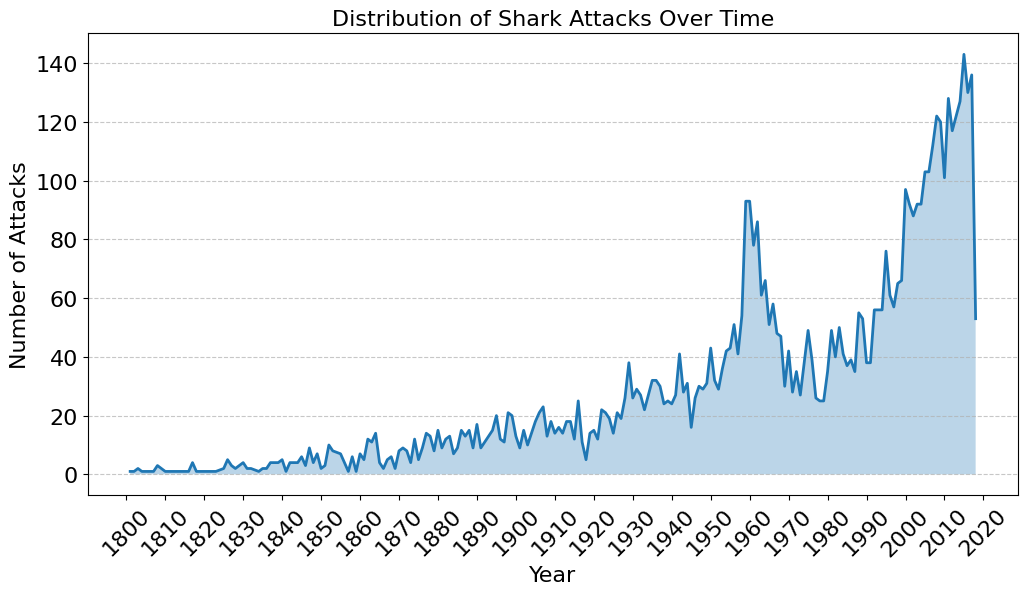

In [229]:
year_counts = df[df['Year'] > 1800]['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, color='#1f77b4', linewidth=2)
plt.fill_between(year_counts.index, year_counts.values, alpha=0.3)

# Increased fontsize for ticks
plt.xticks(np.arange(1800, 2021, 10), rotation=45, fontsize=16)
plt.yticks(fontsize=16)

plt.title('Distribution of Shark Attacks Over Time', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Attacks', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

There is a huge spike in Global Shark Attack in the latter years. This is not due to the more aggressive sharks but rather the better technology in keeping track of the incident.

## Group of Fatality comparison with Age

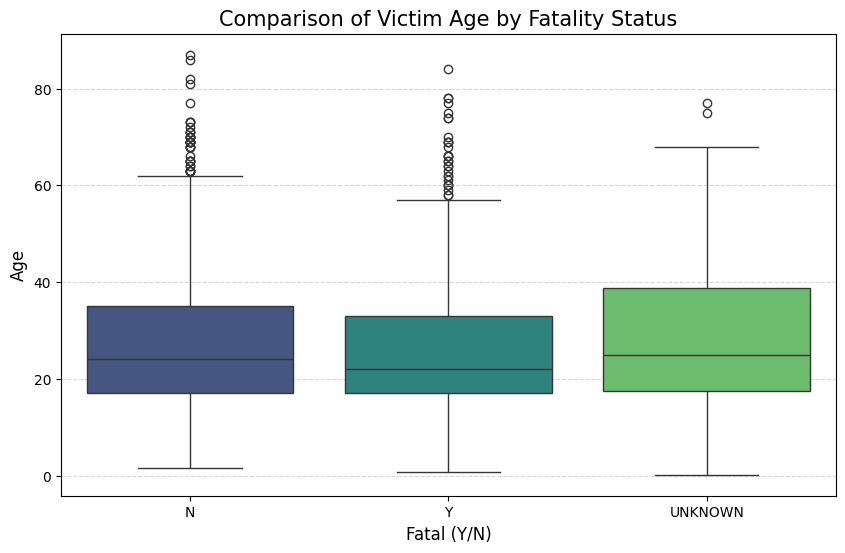

,count,mean,std,min,25%,50%,75%,max
Fatal (Y/N),,,,,,,,
N,2604.0,27.229071,13.702510,1.500000,17.0,24.0,35.0,87.0
UNKNOWN,239.0,28.729149,14.993239,0.166667,17.5,25.0,38.8,77.0
Y,613.0,27.006933,14.300851,0.750000,17.0,22.0,33.0,84.0


In [230]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Fatal (Y/N)', y='Age', palette='viridis', hue='Fatal (Y/N)', legend=False)

plt.title('Comparison of Victim Age by Fatality Status', fontsize=15)
plt.xlabel('Fatal (Y/N)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

# Calculate summary statistics for further insight
age_fatal_summary = df.groupby('Fatal (Y/N)')['Age'].describe()
display(age_fatal_summary)

## Group of Shark Species Fatality Comparison

<Figure size 1000x600 with 0 Axes>

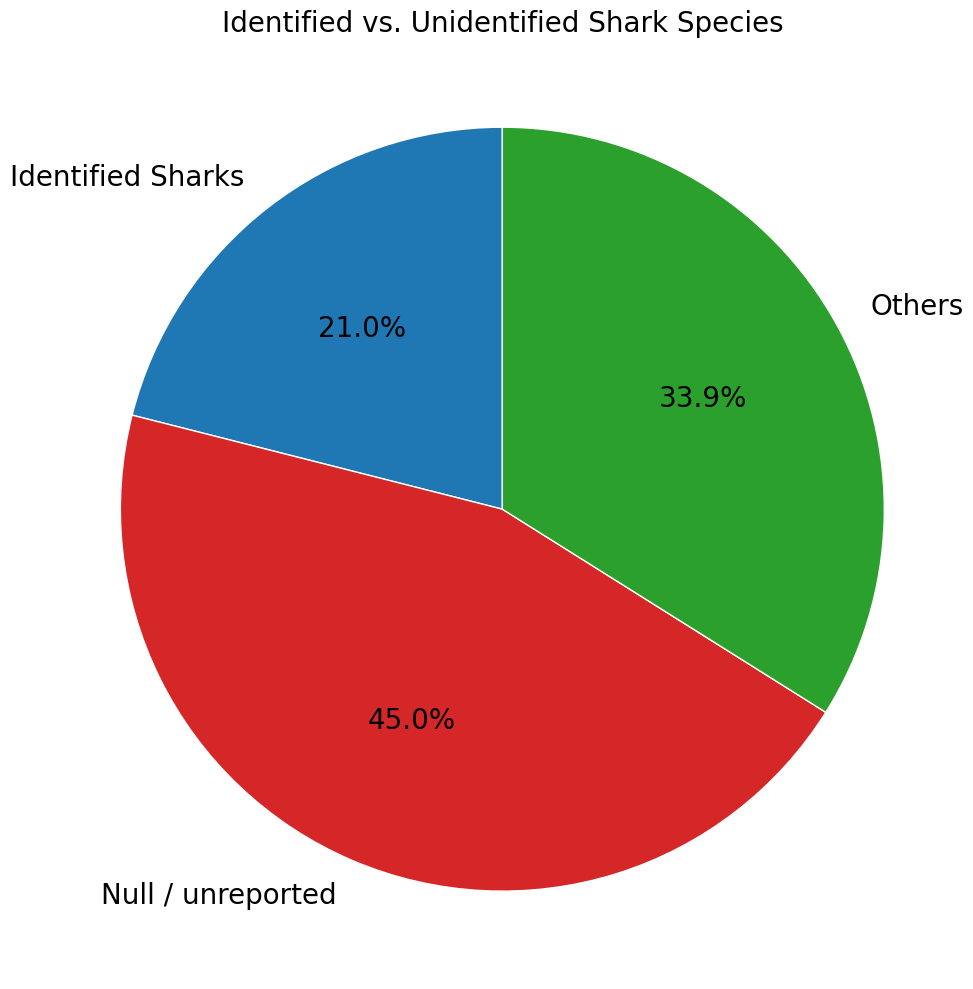

In [231]:
plt.figure(figsize=(10, 6))
species_counts = df['Species '].value_counts()

others_count = species_counts.get('Others', 0)
unreported_count = species_counts.get('Null', 0)
identified_count = species_counts.sum() - unreported_count - others_count

plt.figure(figsize=(10, 10))
labels = ['Identified Sharks', 'Null / unreported', 'Others']
sizes = [identified_count, unreported_count, others_count]
colors = ['#1f77b4', '#d62728', '#2ca02c']

# Increased font size using textprops and larger title font
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 20})

plt.title('Identified vs. Unidentified Shark Species', fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

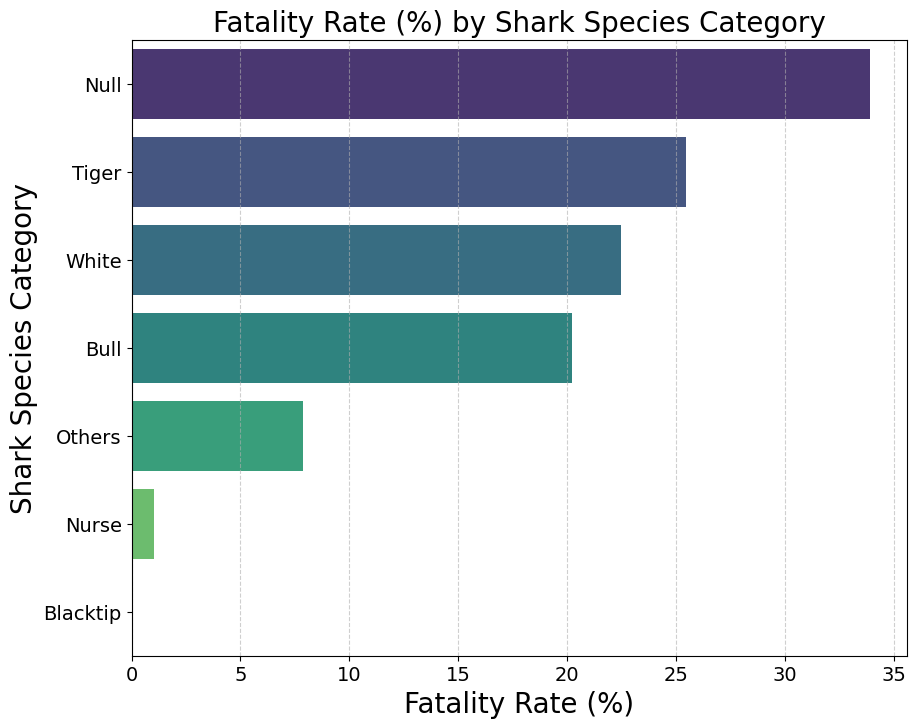

Fatality Rate (%) by Shark Species Category:
Species 
Null         33.9%
Tiger       25.44%
White       22.49%
Bull        20.22%
Others       7.86%
Nurse        1.03%
Blacktip      0.0%
Name: Y, dtype: object


In [232]:
species_fatal = df.groupby('Species ')['Fatal (Y/N)'].value_counts(normalize=True).unstack(fill_value=0) * 100

species_fatality_rate = species_fatal['Y'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=species_fatality_rate.values, y=species_fatality_rate.index, palette='viridis', hue=species_fatality_rate.index, legend=False)

# Increasing font sizes for all text elements
plt.title('Fatality Rate (%) by Shark Species Category', fontsize=20)
plt.xlabel('Fatality Rate (%)', fontsize=20)
plt.ylabel('Shark Species Category', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

print("Fatality Rate (%) by Shark Species Category:")
print(species_fatality_rate.round(2).apply(lambda x: f"{x}%"))

The inference can be made that Big 3 Sharks (White, Bull and Tiger) are deadly with 20% - 25% fatality rates. While small sharks like Nurse, Blacktip and others are 0% - 7%.

Survivorship Bias:

The intuition is that the more deadly and aggressive the species are the more fatality. However, that is not the case, since Null having larger fatality rate than the Big 3 in percentage wise. We focus only on survived report while overlooking the ones that do not. The Null infers that the Big 3 was underestimated. If the victims survive, then they were able to report which species were they got attacked thus moving out of 'Null' to one of the Big-3 categories. However, since they did not survive, they were not able to report hence staying in the 'Null' category.   

## Relationship between Year and Fatality Rate

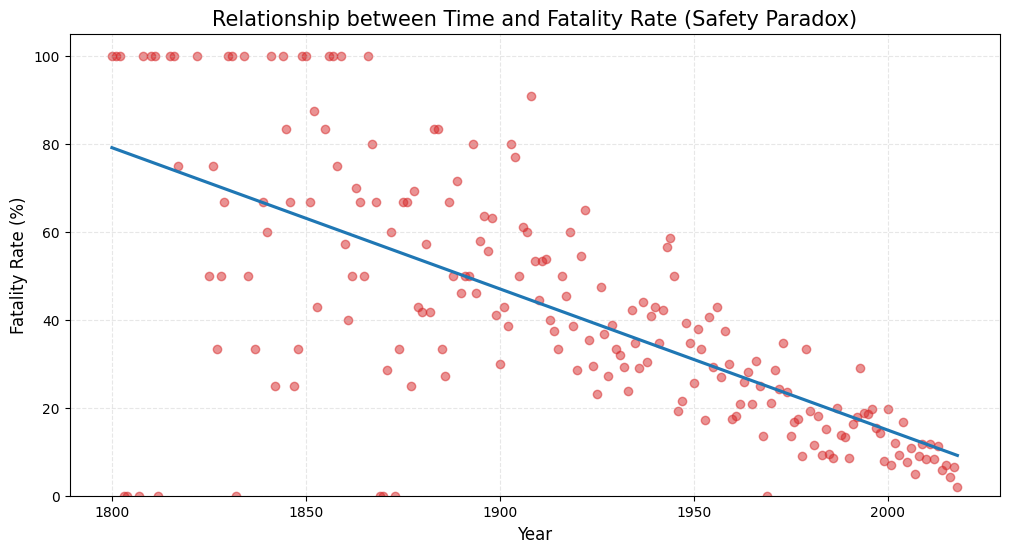

Insight: The downward trend indicates that while total reports increased (as seen in the earlier histogram),
the percentage of fatal attacks has significantly decreased over time due to improved medical care and safety.


In [233]:
yearly_stats = df[(df['Year'] >= 1800) & (df['Fatal (Y/N)'].isin(['Y', 'N']))].copy()

yearly_stats['Is_Fatal'] = yearly_stats['Fatal (Y/N)'] == 'Y'
fatality_rate_by_year = yearly_stats.groupby('Year')['Is_Fatal'].mean().reset_index()
fatality_rate_by_year['Fatality Rate (%)'] = fatality_rate_by_year['Is_Fatal'] * 100

plt.figure(figsize=(12, 6))
sns.regplot(data=fatality_rate_by_year, x='Year', y='Fatality Rate (%)', ci=None,
            scatter_kws={'alpha':0.5, 'color':'#d62728'}, line_kws={'color':'#1f77b4'})

plt.title('Relationship between Time and Fatality Rate (Safety Paradox)', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Fatality Rate (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.ylim(0, 105)

plt.show()

print("Insight: The downward trend indicates that while total reports increased (as seen in the earlier histogram),")
print("the percentage of fatal attacks has significantly decreased over time due to improved medical care and safety.")

#Descriptive Statistics

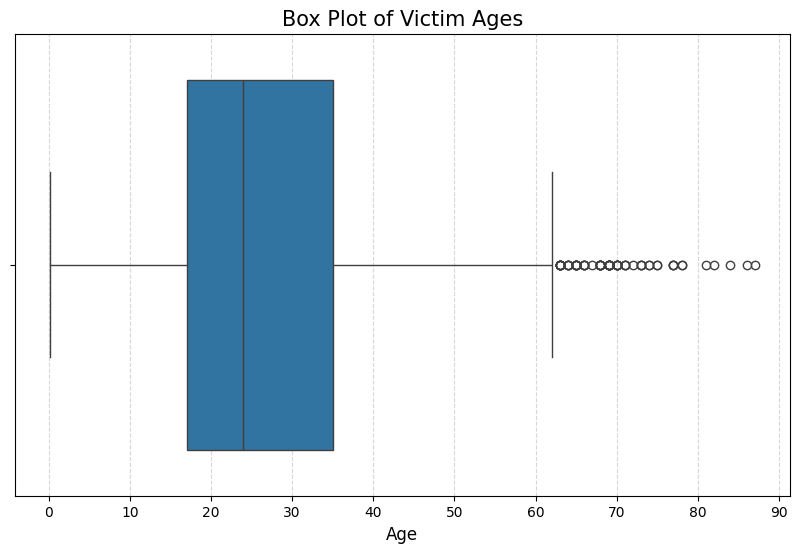

In [234]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'].dropna(), color='#1f77b4')

plt.xticks(np.arange(0, df['Age'].max() + 10, 10))

plt.title('Box Plot of Victim Ages', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

In [235]:
Age_clean = pd.to_numeric(df['Age'], errors='coerce')

age_stats = Age_clean.describe()
median_age = age_stats['50%']
iqr = age_stats['75%'] - age_stats['25%']

print(f"Median Age: {median_age:.1f}")
print(f"IQR: {iqr:.1f} (Q1={age_stats['25%']:.1f}, Q3={age_stats['75%']:.1f})")

Median Age: 24.0
IQR: 18.0 (Q1=17.0, Q3=35.0)


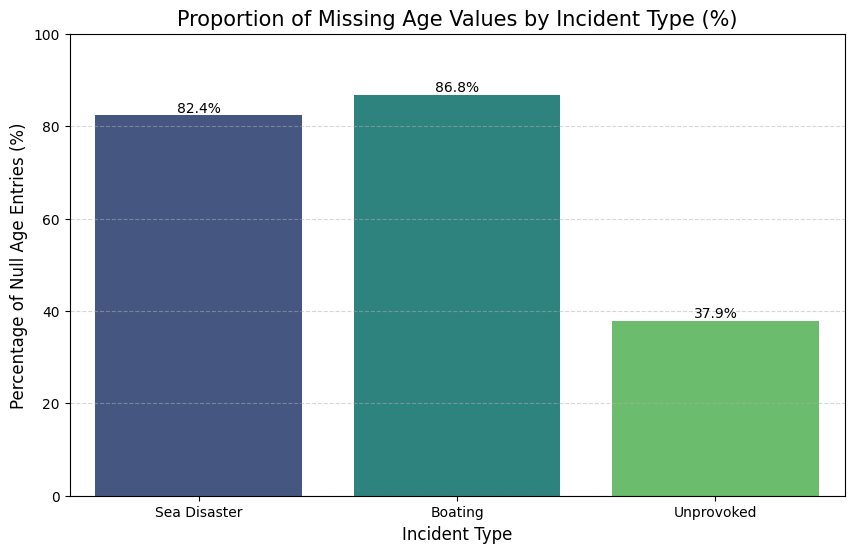

In [236]:
target_types = ['Sea Disaster', 'Boating', 'Unprovoked']
subset = df[df['Type'].isin(target_types)]

total_counts_by_type = subset.groupby('Type').size()

null_age_by_type = subset[subset['Age'].isnull()].groupby('Type').size()
null_age_by_type = null_age_by_type.reindex(target_types, fill_value=0)

null_proportions = (null_age_by_type / total_counts_by_type.reindex(target_types)) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=null_proportions.index, y=null_proportions.values, palette='viridis', hue=null_proportions.index, legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('Proportion of Missing Age Values by Incident Type (%)', fontsize=15)
plt.xlabel('Incident Type', fontsize=12)
plt.ylabel('Percentage of Null Age Entries (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [237]:
null_ages = df['Age'].isnull().sum()
total_rows = len(df)
print(f"Number of null Age values: {null_ages}")
print(f"Total rows in dataset: {total_rows}")
print(f"Percentage of null Age values: {(null_ages/total_rows)*100:.2f}%")

Number of null Age values: 2846
Total rows in dataset: 6302
Percentage of null Age values: 45.16%
